In [101]:
import config
import pandas as pd
from sodapy import Socrata
import mysql.connector
import alc_connect as alc
import scipy.stats as stats
from math import sqrt
import seaborn as sns

## Joining Weather Data and Arrest Data

In [4]:
all_data = pd.read_sql_query('Select * FROM brooklyn_weather JOIN brooklyn_arrest ON brooklyn_arrest.Date = brooklyn_weather.Date', alc.db)

Dropping Duplicate 'Date' Column

In [5]:
cols = []
count = 1
for column in all_data.columns:
    if column == 'Date':
        cols.append(f'Date_{count}')
        count+=1
        continue
    cols.append(column)
all_data.columns = cols

In [6]:
all_data.drop(['Date_2'], axis = 1, inplace = True)

In [7]:
all_data.rename(columns ={'Date_1':'Date'}, inplace = True)

Storing All Data in SQL Database

In [ ]:
all_data.to_sql('all_data', alc.db, if_exists = 'replace', index = False)

## Getting Female and Male Arrests By Day 

In [123]:
SexFor_df = all_data.groupby(['Date','Sex']).count()

SexFor_df.drop(['Moon Phase','Wind Speed', 'Average_Temp', 'Offense_Level', 'Race','Latitude','Longitude'], axis = 1, inplace = True)

In [127]:
SexFor_df.drop(['Forecast','Crime_Description'], axis =1, inplace = True)

In [130]:
SexFor_df.rename(columns={'Age_Group':'Arrests'}, inplace = True)

In [134]:
SexFor_df.reset_index(inplace = True)

In [136]:
DateFor_df.groupby('Sex')['Arrests'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,271.0,29.291513,7.830134,10.0,24.0,30.0,33.0,53.0
M,271.0,137.811808,31.567295,77.0,113.0,138.0,160.0,267.0


In [138]:
pooled = (31.56**2 + 7.83**2)/2
pooled

528.67125

In [141]:
def twosample_tstatistic():
    denom = np.sqrt(528.67*((1/271))+(1/271))
    num = 8.49
    return num/denom

t_stat = twosample_tstatistic()
t_stat

6.07280936113842

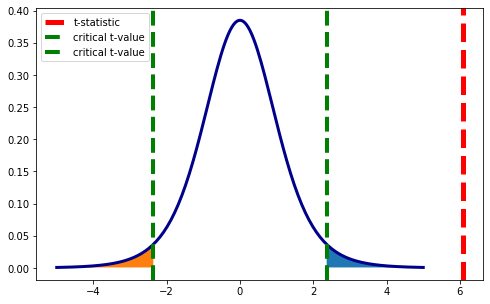

In [142]:

xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)


fig = plt.figure(figsize=(8,5))

ax = fig.gca()


ax.plot(xs, ys, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t_stat, color='red', linestyle='--', lw=5,label='t-statistic')

negative_t_crit = -t_crit

ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.axvline(-t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.fill_betweenx(ys,xs,t_crit,where= xs > t_crit)
ax.fill_betweenx(ys,xs,negative_t_crit,where= xs < negative_t_crit )

ax.legend()
plt.show()

Sex and Arrest relation is statistically signficiant

## Getting Statistics for #Arrests by Forecast

In [8]:
DateFor_df = all_data.groupby(['Date','Forecast']).count()

In [9]:
DateFor_df.drop(['Moon Phase','Wind Speed', 'Average_Temp', 'Offense_Level','Age_Group', 'Sex', 'Race','Latitude','Longitude'], axis = 1, inplace = True)

In [10]:
DateFor_df.rename(columns={'Crime_Description':'Arrests'}, inplace = True)

In [11]:
DateFor_df.reset_index(inplace = True)

In [12]:
DateFor_df

,Date,Forecast,Arrests
0,2019-01-01,rain,132
1,2019-01-02,partly-cloudy-day,178
2,2019-01-03,partly-cloudy-day,226
3,2019-01-04,clear-day,205
4,2019-01-05,rain,175
...,...,...,...
266,2019-09-26,rain,184
267,2019-09-27,clear-day,168
268,2019-09-28,partly-cloudy-day,104
269,2019-09-29,clear-day,103


In [13]:
DateFor_df.groupby('Forecast')['Arrests'].describe()

,count,mean,std,min,25%,50%,75%,max
Forecast,,,,,,,,
clear-day,88.0,166.750000,35.428818,103.0,139.00,162.5,188.75,306.0
cloudy,6.0,174.333333,32.097767,141.0,147.00,171.5,197.50,217.0
partly-cloudy-day,69.0,166.840580,39.617889,96.0,133.00,168.0,196.00,263.0
rain,100.0,167.780000,33.952308,92.0,139.00,167.5,190.25,271.0
snow,8.0,159.375000,36.718767,107.0,129.75,161.0,195.75,200.0


In [14]:
DateFor_df['Arrests'].describe()

count    271.000000
mean     167.103321
std       35.771865
min       92.000000
25%      139.000000
50%      165.000000
75%      192.500000
max      306.000000
Name: Arrests, dtype: float64

## Clear-Days

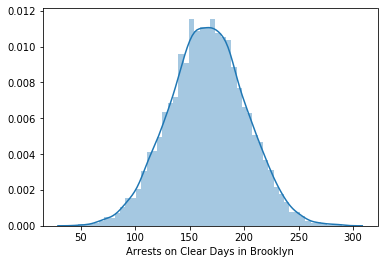

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mu, sd = 166.75, 35.428
n = 8000
s = np.random.normal(mu, sd, n)
sns.distplot(s, axlabel = 'Arrests on Clear Days in Brooklyn')

#sample size is reflective of the population

In [16]:
# Clear-Day
x_bar = 166.75 # sample mean 
n = 88 # number of samples
sd = 35.77 # sd of population
mu = 167.10 # Population mean 

z = (x_bar - mu)/(sd/sqrt(n))
z #z statistic

-0.09178895811787384

In [17]:
pval = 1 - stats.norm.cdf(z)
pval #alpha = .05

0.5365671414146926

What we can say is that there is not enough evidence to reject the null hypothesis with the given sample, given an alpha of 0.05.

## Cloudy Days

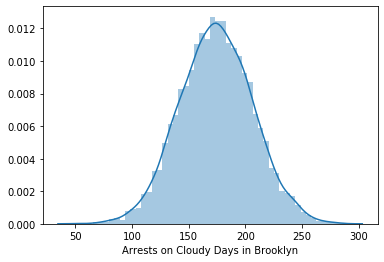

In [18]:
mu, sd = 174.33, 32.09
n = 8000
s = np.random.normal(mu, sd, n)
sns.distplot(s, axlabel = 'Arrests on Cloudy Days in Brooklyn')

#sample size is reflective of the population

In [143]:
#cloudy
x_bar = 174.33
n = 6
sd = 32.09 #sd of sample population 
mu = 167.10 

df = n-1

diff = x_bar - mu
print ('The sample contains', n, 'observations, having a mean of', x_bar, "and a standard deviation = ", sd, 
       ", with", df, 'degrees of freedom. The difference between sample and population means is:', diff)


The sample contains 6 observations, having a mean of 174.33 and a standard deviation =  32.09 , with 5 degrees of freedom. The difference between sample and population means is: 7.230000000000018


In [20]:
t = (x_bar -  mu)/(sd/np.sqrt(n))
t #t_score 

0.5518794278691935

In [21]:
t_crit = np.round(stats.t.ppf(1 - 0.025, df=24),3)
t_crit #t_critical value

2.064

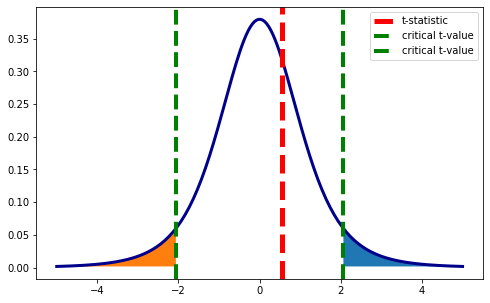

In [22]:

xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)


fig = plt.figure(figsize=(8,5))


ax = fig.gca()


ax.plot(xs, ys, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='t-statistic')

negative_t_crit = -t_crit

ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.axvline(-t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.fill_betweenx(ys,xs,t_crit,where= xs > t_crit)
ax.fill_betweenx(ys,xs,negative_t_crit,where= xs < negative_t_crit )

ax.legend()
plt.show()

## Partly Cloudy

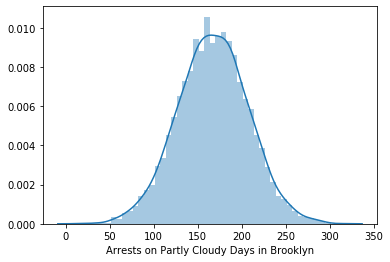

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mu, sd = 166.840580, 39.617889
n = 5000
s = np.random.normal(mu, sd, n)
sns.distplot(s, axlabel = 'Arrests on Partly Cloudy Days in Brooklyn')

#sample size is reflective of the population



In [24]:
# Partly Cloudy
x_bar = 166.840580 # sample mean 
n = 69 # number of samples
sd = 39.617889 # sd of population
mu = 167.10 # Population mean 

z = (x_bar - mu)/(sd/sqrt(n))
z #z statistic

-0.05439220556446748

In [25]:
pval = 1 - stats.norm.cdf(z)
pval #alpha = .05

0.5216886556389477

What we can say is that there is not enough evidence to reject the null hypothesis with the given sample, given an alpha of 0.05.

## Rainy Days

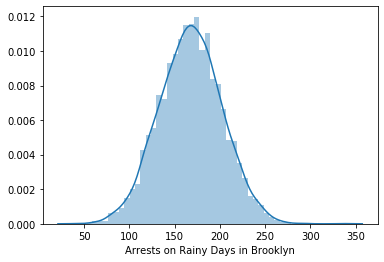

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mu, sd = 167.78, 33.952308
n = 5000
s = np.random.normal(mu, sd, n)
sns.distplot(s, axlabel = 'Arrests on Rainy Days in Brooklyn')

#sample size is reflective of the population

In [27]:
# Partly Cloudy
x_bar = 167.78 # sample mean 
n = 100 # number of samples
sd = 33.952308 # sd of population
mu = 167.10 # Population mean 

z = (x_bar - mu)/(sd/sqrt(n))
z #z statistic

0.2002809352459947

In [28]:
pval = 1 - stats.norm.cdf(z)
pval #alpha = .05

0.4206304359731471

## Snow Days

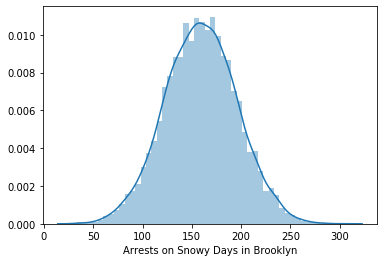

In [29]:
mu, sd = 159.375, 36.718767
n = 8000
s = np.random.normal(mu, sd, n)
sns.distplot(s, axlabel = 'Arrests on Snowy Days in Brooklyn')

#sample size is reflective of the population

In [144]:
x_bar = 159.375
n = 8
sd = 36.718767 #sd of sample population 
mu = 167.10 

df = n-1

diff = x_bar - mu
print ('The sample contains', n, 'observations, having a mean of', x_bar, "and a standard deviation = ", sd, 
       ", with", df, 'degrees of freedom. The difference between sample and population means is:', diff)

The sample contains 8 observations, having a mean of 159.375 and a standard deviation =  36.718767 , with 7 degrees of freedom. The difference between sample and population means is: -7.724999999999994


In [31]:
t = (x_bar -  mu)/(sd/np.sqrt(n))
t #t_score 

-0.5950526481094615

In [32]:
t_crit = np.round(stats.t.ppf(1 - 0.025, df),3)
t_crit #t_critical value

2.365

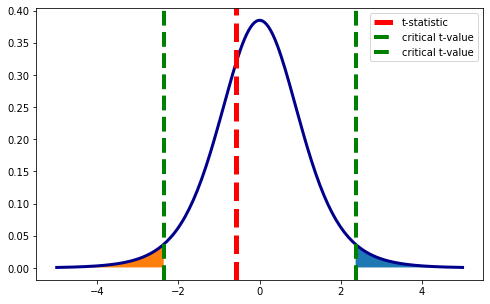

In [33]:

xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)


fig = plt.figure(figsize=(8,5))


ax = fig.gca()


ax.plot(xs, ys, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='t-statistic')

negative_t_crit = -t_crit

ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.axvline(-t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.fill_betweenx(ys,xs,t_crit,where= xs > t_crit)
ax.fill_betweenx(ys,xs,negative_t_crit,where= xs < negative_t_crit )

ax.legend()
plt.show()

## Getting Statistics For Arrests By Sex On Forecast Day

In [44]:
DateForSex_df = all_data.groupby(['Date','Forecast','Sex']).count()

In [49]:
DateForSex_df.drop(['Crime_Description'], axis = 1, inplace = True) #need to drop other columns as well

In [52]:
DateForSex_df.rename(columns={'Age_Group':'Arrests'}, inplace = True)

In [79]:
DateForSex_df.reset_index(inplace = True)

In [82]:
DateForSex_df.head()

,Date,Forecast,Sex,Arrests
0,2019-01-01,rain,F,18
1,2019-01-01,rain,M,114
2,2019-01-02,partly-cloudy-day,F,41
3,2019-01-02,partly-cloudy-day,M,137
4,2019-01-03,partly-cloudy-day,F,27


In [71]:
df_sex_weather = DateForSex_df.groupby(['Forecast','Sex'])['Arrests'].describe()

In [116]:
df_sex_weather

count        mean        std    min     25%    50%  \
Forecast          Sex                                                       
clear-day         F     88.0   29.454545   7.111443   16.0   25.00   30.0   
                  M     88.0  137.295455  32.188796   77.0  113.00  136.5   
cloudy            F      6.0   28.000000   5.796551   20.0   24.00   28.5   
                  M      6.0  146.333333  29.377996  118.0  121.50  140.0   
partly-cloudy-day F     69.0   29.304348   8.952989   10.0   23.00   30.0   
                  M     69.0  137.536232  33.808970   78.0  113.00  138.0   
rain              F    100.0   29.080000   7.718115   12.0   24.00   28.0   
                  M    100.0  138.700000  29.997811   79.0  113.75  139.0   
snow              F      8.0   31.000000   9.242758   18.0   24.50   31.0   
                  M      8.0  128.375000  30.533062   89.0  103.25  133.0   

                          75%    max  
Forecast          Sex                 
clear-day         F     33.00   53.0  
                  M    157.75  267.0  
cloudy            F     32.25   35.0  
                  M    172.00  182.0  
partly-cloudy-day F     35.00   51.0  
                  M    163.00  218.0  
rain              F     33.00   49.0  
                  M    159.00  247.0  
snow              F     35.00   46.0  
                  M    154.00  167.0

## Box Plot - Average number of arrets each day by gender

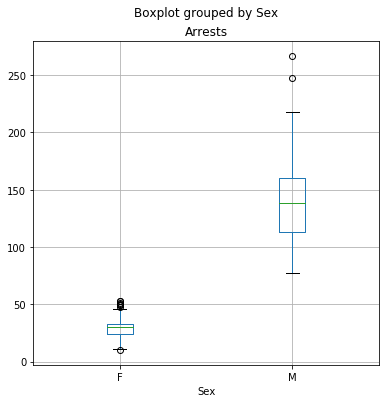

In [110]:
DateForSex_df.boxplot('Arrests', by = 'Sex', figsize=(6,6),)

## Boxplot - Arrests Across Weather Condition

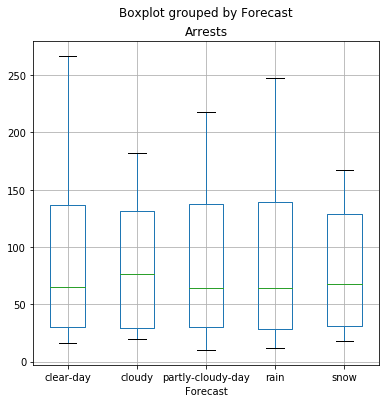

In [112]:
DateForSex_df.boxplot('Arrests', by = 'Forecast', figsize=(6,6))

## Anova Testing - (All Forecasts and Arrests) and (Forecast and Gender interaction)

In [118]:
anova_season = ols('Arrests ~ Forecast ',data=DateForSex_df).fit()

anova_table = sm.stats.anova_lm(anova_season, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Forecast,4.0,4.264962e+02,106.624038,0.030441,0.998214
Residual,537.0,1.880918e+06,3502.639772,NaN,NaN


In [90]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm

anova_season = ols('Arrests ~ Forecast * Sex',data=DateForSex_df).fit()

anova_table = sm.stats.anova_lm(anova_season, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Forecast,4.0,4.264962e+02,1.066240e+02,0.199514,9.385883e-01
Sex,1.0,1.595737e+06,1.595737e+06,2985.922115,2.262554e-220
Forecast:Sex,4.0,8.694037e+02,2.173509e+02,0.406704,8.038621e-01
Residual,532.0,2.843115e+05,5.344201e+02,NaN,NaN
